In [2]:
%load_ext autoreload
%autoreload 2
import feature_extract
import sys
sys.path.append("..")
import torch
import psql_methods as psql
import pickle
import alchemy_methods as alc
from tqdm import tqdm
import numpy as np
import image_utils as imgs
import opensea_methods as opse
import multiprocessing
import pandas as pd
import feature_utils as feat
import matplotlib.pyplot as plt
import counterfeit_utils as cfu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pw_dists = pd.read_pickle('pw_dists_counterfeit.pkl')
pw_dists_no_dupe = pw_dists.query("Top_100!='.ipynb_checkpoints'")
slugs = list(pw_dists_no_dupe['Alt'].unique())
commands = ["SELECT * from collectiontoaddress"]
data = psql.execute_commands(commands)
slug_to_contract = {x[0]:x[1] for x in data}
print(slug_to_contract['milady'])

0x5af0d9827e0c53e4799bb226655a1de152a425a5


In [7]:
opse.pull_sales_data(collection_slug='pudgypenguins',saved=True)

('pudgypenguins', '1344', '0x29469395eaf6f95920e59f858042f0e28d98a20b', '0xb3aa9923489bc2bfec323bf05346acd4afbc92a0', 1704334427, 10.82, 'WETH', '0x365768f8388e73500de408a6fcff8f6e5feb9725ad3c82b5206610d115eef445')
2024-01-04 02:13:47
('pudgypenguins', '3390', '0x6f9bb71b5f85c26e9a8a7cc647c5943a1b07d6ed', '0x0c75f526299846668f1e9323764ad45ff9c15b07', 1702300631, 10.760000000000002, 'WETH', '0x5a93d11214d55ed2cf314838e6b8ca1e33a5376b289cdc86c8d6c2d6c5582da6')
2023-12-11 13:17:11
('pudgypenguins', '7468', '0x495cf63da37f1ee213bb0635048ecb783497099e', '0x8575f8413cfc621efb6f6cc7afbca7ef28118281', 1700106503, 5.4, 'ETH', '0x0eea17fe77e1e7948642c1de51010c06e63fffedf5e56b3d2de7cfbf572d1ac5')
2023-11-16 03:48:23
('pudgypenguins', '5823', '0x29469395eaf6f95920e59f858042f0e28d98a20b', '0xc58d63d59ad68930c9fdff6f1ac479c5c9941ef4', 1695742079, 4.45, 'WETH', '0x723fe5d78c515449e03aadf8dca98d37e5f9a3f10e45a1b67238d523172efcb9')
2023-09-26 15:27:59
('pudgypenguins', '7520', '0x29469395eaf6f95920e59f

[]

In [ ]:
contracts = []
for slug in slugs:
    try:
        contracts.append((slug,slug_to_contract[slug]))
    except:
        print(f'Missed {slug}')
slug_to_owners = alc.contracts_to_owners(contracts,token_ids=True)

Missed bond-bears
Missed cryptocubes
Missed cryptokhat
Missed dendro-by-vebjorn-isaksen
Missed gazers-by-matt-kane
Missed hamburgnights
Missed heart-craft-by-snowfro-jordan-lyall
Missed kartparty-ykz-1
Missed qql-mint-pass
Missed rainbow-world-2
Missed rhythm-and-the-machine-by-lars-wander
Missed servantsofthemuse
Missed the-second-aspect-of-the-nine
Missed trump-digital-trading-cards
Missed vera-molnar-themes-and-variations
Missed water-mililys
Missed y00ts
Missed yayo-nft
Missed youtherealmvp


 79%|███████████████████████████████████▎         | 8607/10958 [1:13:18<19:01,  2.06it/s]

In [50]:
# df = cfu.get_overlaps('boredapeyachtclub',pw_dists)
count_df = cfu.count_overlaps_new('cool-cats-nft',pw_dists)

10976
(1, 0, 'zombiecat')


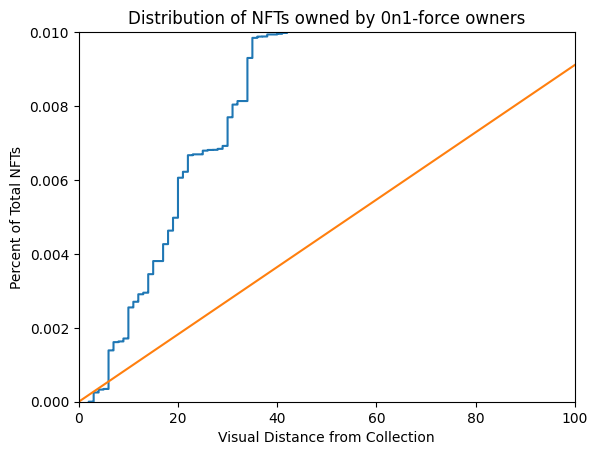

count    640053.000000
mean       4977.105943
std        3204.682526
min           2.000000
0.1%          6.000000
0.2%         10.000000
1%           42.000000
10%         524.000000
25%        2173.000000
50%        4817.000000
75%        7708.000000
max       10976.000000
dtype: float64


In [51]:
count_df
column_order = ['sorted_order', 'row_count', 'slug']
new_df = count_df[column_order]
list_of_tuples = [tuple(row) for row in new_df.itertuples(index=False)]
cfu.make_overlap_cdf(slug,overlaps=list_of_tuples,der_list = None,xlim=100,ylim=0.01)

9933
(1, 1263, 'bitcoin-miladys')


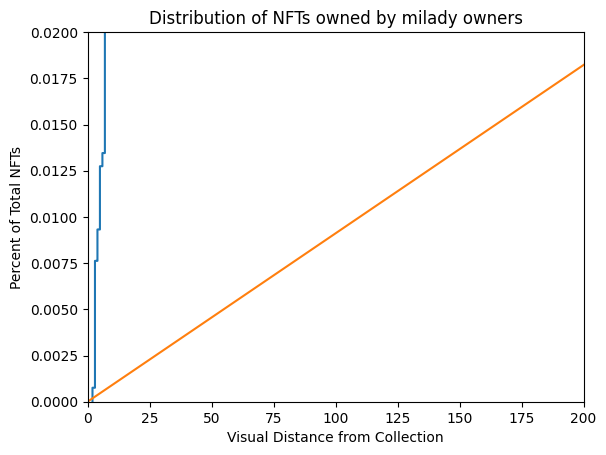

count    279058.000000
mean       4250.249618
std        3371.135433
min           2.000000
0.1%          3.000000
0.2%          3.000000
1%            5.000000
10%          45.000000
25%        1012.250000
50%        4059.000000
75%        7017.000000
max       10976.000000
dtype: float64


In [85]:
cfu.compute_overlap_cdf('milady',der_list = ['bitcoin-miladys'],xlim=200,ylim=0.02)

In [71]:
cfu.find_ownership_date('','milady',10)

0x5af0d9827e0c53e4799bb226655a1de152a425a5 10


[('milady',
  '10',
  '0x0000000000000000000000000000000000000000',
  '0x5e30c99a4c6219a6ad97a6f0ff0214e72fa80c90',
  1629865469,
  None,
  None,
  '0xd6ef7244a00f38fe1665721dc4095834e94d8f514c5b6a2db3a385a092921824')]

In [100]:
drop_dead = cfu.get_overlaps('milady').query("address!='0x000000000000000000000000000000000000dEaD' and sorted_order<100")
peeps_to_check = drop_dead[['slug', 'address']].drop_duplicates()
peeps_to_check
og_wallets = drop_dead[['address']].drop_duplicates()['address'].to_list()

In [94]:
cfu.find_earliest_ownership_date('0x8C75D3585a21c21Bb62cC255836d6531BD948f1a','kizunagenesis')

100%|████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.55it/s]


1685685983

In [3]:
command = "select distinct slug from objective_cf_num where num>=5"
rows = psql.execute_commands([command])
slugs = [row[0] for row in rows]
command = "select distinct slug from ownership_dates"
rows = psql.execute_commands([command])
done_slugs = [row[0] for row in rows]
slugs_left = [x for x in slugs if x not in done_slugs]
slugs_left


['wonderpals',
 'hashmasks',
 'supducks',
 'moonbirds-oddities',
 'the-crypto-chicks',
 'renga',
 'valhalla',
 'degods',
 'kanpai-pandas',
 'deadfellaz',
 'lilpudgys',
 '3landers',
 'sneaky-vampire-syndicate',
 'coolmans-universe',
 'parallelalpha',
 'kiwami-genesis',
 'killergf',
 'mutant-ape-yacht-club',
 'cryptodickbutts-s3',
 'superrare',
 'tubby-cats',
 'forgottenruneswizardscult',
 'livesofasuna',
 'remilio-babies',
 'chimpersnft',
 'kprverse',
 'bears-deluxe',
 'artgobblers',
 'guttercatgang',
 'rare-apepes',
 'pxnghostdivision',
 'degentoonz-collection',
 'metahero-generative',
 'genuine-undead',
 'clonex',
 'curiocardswrapper',
 'phantabear',
 'thepotatoz',
 'veefriends-series-2',
 'muribyfabrik',
 'veefriends',
 'theshiboshis',
 'quirkiesoriginals']

In [ ]:
for slug in slugs_left:
    print(slug)
    cfu.store_ownership_dates(slug)

wonderpals


 51%|█████████████████████▊                     | 264/519 [04:22<13:42,  3.23s/it]

error
<Response [429]>


 56%|████████████████████████▏                  | 292/519 [04:57<03:46,  1.00it/s]

error
<Response [429]>


 61%|██████████████████████████                 | 314/519 [05:22<07:04,  2.07s/it]

error
<Response [429]>


 65%|███████████████████████████▉               | 337/519 [06:01<03:01,  1.00it/s]

error
<Response [429]>


 70%|██████████████████████████████▏            | 364/519 [06:23<01:35,  1.63it/s]

error
<Response [429]>


 74%|███████████████████████████████▋           | 383/519 [06:46<03:44,  1.65s/it]

error
<Response [429]>


 77%|█████████████████████████████████          | 399/519 [07:05<00:53,  2.26it/s]

error
<Response [429]>


 86%|█████████████████████████████████████      | 447/519 [07:45<00:32,  2.19it/s]

error
<Response [429]>


 90%|██████████████████████████████████████▊    | 469/519 [08:03<00:25,  1.95it/s]

error
<Response [429]>


100%|███████████████████████████████████████████| 519/519 [08:47<00:00,  1.02s/it]
11it [00:12,  1.47s/it]

error
<Response [429]>


29it [00:37,  1.21s/it]

error
<Response [429]>


53it [01:09,  1.48it/s]

error
<Response [429]>


75it [01:31,  1.19it/s]

error
<Response [429]>


96it [01:57,  1.15s/it]

error
<Response [429]>


111it [02:18,  1.58it/s]

error
<Response [429]>


127it [02:41,  1.10it/s]

error
<Response [429]>


153it [03:08,  1.04s/it]

error
<Response [429]>


398it [09:12, 31.28s/it]

error
<Response [524]>


549it [11:58,  1.02it/s]

error
<Response [429]>
error
<Response [429]>


555it [12:24,  1.76s/it]

error
<Response [429]>
error
<Response [429]>


556it [12:53,  9.83s/it]

error
<Response [429]>


566it [13:10,  1.24s/it]

error
<Response [429]>


572it [13:36,  2.30s/it]

error
<Response [429]>


577it [13:48,  1.44s/it]


hashmasks


 10%|████▍                                       | 42/415 [00:38<03:53,  1.59it/s]

error
<Response [429]>


 13%|█████▋                                      | 54/415 [00:59<09:38,  1.60s/it]

error
<Response [429]>


 19%|████████▍                                   | 79/415 [01:31<08:13,  1.47s/it]

error
<Response [429]>


 26%|██████████▉                                | 106/415 [02:01<03:36,  1.43it/s]

error
<Response [429]>


 29%|████████████▌                              | 121/415 [02:33<11:49,  2.41s/it]

error
<Response [400]>


 30%|████████████▋                              | 123/415 [02:34<07:32,  1.55s/it]

error
<Response [429]>


 34%|██████████████▌                            | 141/415 [03:06<07:52,  1.73s/it]

error
<Response [429]>


 37%|████████████████                           | 155/415 [03:45<09:50,  2.27s/it]

error
<Response [429]>


 40%|█████████████████▍                         | 168/415 [04:03<03:22,  1.22it/s]

error
<Response [400]>


 42%|██████████████████▏                        | 175/415 [04:16<04:38,  1.16s/it]

error
<Response [429]>


 47%|████████████████████                       | 194/415 [04:57<03:58,  1.08s/it]

error
<Response [429]>


 47%|████████████████████▎                      | 196/415 [05:04<07:14,  1.99s/it]

error
<Response [429]>


 49%|█████████████████████                      | 203/415 [06:10<13:24,  3.80s/it]

error
<Response [429]>


 51%|█████████████████████▊                     | 210/415 [06:19<03:01,  1.13it/s]

error
<Response [524]>


 67%|████████████████████████████▌              | 276/415 [09:33<02:46,  1.20s/it]

error
<Response [400]>
error
<Response [400]>


 80%|██████████████████████████████████▌        | 334/415 [11:37<01:38,  1.21s/it]

error
<Response [400]>


 89%|██████████████████████████████████████▏    | 368/415 [12:20<01:38,  2.10s/it]

error
<Response [400]>


 96%|█████████████████████████████████████████▎ | 399/415 [13:08<00:13,  1.19it/s]

error
<Response [429]>


100%|███████████████████████████████████████████| 415/415 [13:33<00:00,  1.96s/it]
6it [00:08,  1.27s/it]

error
<Response [429]>


12it [02:00, 31.77s/it]

error
<Response [524]>


90it [04:04,  2.95s/it]

error
<Response [429]>


92it [04:14,  4.06s/it]

error
<Response [429]>


100it [04:30,  1.27s/it]

error
<Response [429]>


102it [04:36,  1.94s/it]

error
<Response [429]>


113it [04:59,  1.65it/s]

error
<Response [429]>


195it [06:52,  1.71it/s]

error
<Response [429]>


203it [07:06,  1.17it/s]

error
<Response [429]>


211it [07:18,  1.42it/s]

error
<Response [429]>
error
<Response [429]>


213it [07:46,  6.44s/it]

error
<Response [429]>


227it [08:05,  2.15it/s]

error
<Response [429]>


247it [08:20,  2.13it/s]

error
<Response [429]>


260it [08:35,  1.84it/s]

error
<Response [429]>


280it [08:50,  1.79it/s]

error
<Response [429]>


289it [09:02,  1.21it/s]

error
<Response [429]>


305it [09:20,  2.71it/s]

error
<Response [429]>


317it [09:33,  1.60it/s]

error
<Response [429]>


324it [09:49,  1.02it/s]

error
<Response [429]>


330it [09:58,  1.20it/s]

error
<Response [429]>


336it [10:16,  1.45s/it]

error
<Response [429]>


349it [10:31,  1.16it/s]

error
<Response [429]>


354it [10:43,  1.15s/it]

error
<Response [429]>


364it [10:59,  1.66it/s]

error
<Response [429]>


386it [11:14,  2.07it/s]

error
<Response [429]>


391it [11:28,  2.82s/it]

error
<Response [429]>


408it [11:43,  2.10it/s]

error
<Response [429]>


420it [11:57,  1.14it/s]

error
<Response [429]>


429it [12:12,  1.43s/it]

error
<Response [429]>


442it [12:25,  1.69s/it]


supducks


 98%|███████████████████████████████████████████▉ | 83/85 [01:20<00:02,  1.16s/it]

error
<Response [429]>


100%|█████████████████████████████████████████████| 85/85 [01:35<00:00,  1.13s/it]
1it [00:03,  3.14s/it]

error
<Response [429]>


8it [00:22,  1.65s/it]

error
<Response [429]>


17it [00:43,  2.00s/it]

error
<Response [429]>


26it [01:03,  1.40s/it]

error
<Response [429]>


43it [01:27,  1.44it/s]

error
<Response [429]>


69it [01:59,  1.48it/s]

error
<Response [429]>


87it [02:41,  1.85s/it]


moonbirds-oddities


 16%|███████▏                                    | 45/276 [00:36<02:44,  1.40it/s]

error
<Response [429]>


 25%|██████████▊                                 | 68/276 [00:57<02:11,  1.59it/s]

error
<Response [429]>


 32%|█████████████▊                              | 87/276 [01:17<02:44,  1.15it/s]

error
<Response [429]>


 42%|██████████████████                         | 116/276 [01:40<01:35,  1.68it/s]

error
<Response [429]>


 50%|█████████████████████▎                     | 137/276 [02:00<01:20,  1.73it/s]

error
<Response [429]>


 71%|██████████████████████████████▍            | 195/276 [02:44<00:41,  1.93it/s]

error
<Response [429]>


 84%|███████████████████████████████████▉       | 231/276 [03:18<00:58,  1.29s/it]

error
<Response [429]>


100%|███████████████████████████████████████████| 276/276 [04:36<00:00,  1.00s/it]
3it [00:09,  3.53s/it]

error
<Response [429]>


10it [00:23,  1.93s/it]

error
<Response [429]>


46it [01:26,  2.34it/s]

error
<Response [429]>


78it [01:58,  4.26s/it]

error
<Response [429]>


120it [02:30,  2.60it/s]

error
<Response [429]>


221it [08:59,  1.73it/s]

error
<Response [429]>


234it [09:21,  1.21s/it]

error
<Response [429]>


296it [10:41,  1.46s/it]

error
<Response [429]>


300it [10:52,  2.17s/it]


the-crypto-chicks


  8%|███▋                                        | 49/581 [00:45<09:47,  1.11s/it]

error
<Response [429]>


 11%|████▊                                       | 63/581 [01:14<10:12,  1.18s/it]

error
<Response [429]>


 15%|██████▊                                     | 90/581 [01:45<07:11,  1.14it/s]

error
<Response [429]>


 20%|████████▋                                  | 117/581 [02:18<07:27,  1.04it/s]

error
<Response [429]>


 23%|█████████▉                                 | 134/581 [02:49<09:45,  1.31s/it]

error
<Response [429]>


 26%|███████████▏                               | 151/581 [03:23<11:42,  1.63s/it]

error
<Response [429]>


 27%|███████████▊                               | 159/581 [03:58<14:20,  2.04s/it]

error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>


 28%|████████████▏                              | 164/581 [05:05<38:07,  5.48s/it]

error
<Response [429]>


 33%|██████████████▎                            | 193/581 [05:54<06:36,  1.02s/it]

error
<Response [429]>


 43%|██████████████████▋                        | 252/581 [06:58<03:07,  1.75it/s]

error
<Response [429]>


 44%|██████████████████▊                        | 255/581 [07:07<09:16,  1.71s/it]

error
<Response [429]>


 44%|███████████████████                        | 257/581 [07:50<53:38,  9.93s/it]

error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>


 46%|███████████████████▋                       | 266/581 [10:41<23:19,  4.44s/it]

error
<Response [429]>


 55%|███████████████████████▍                   | 317/581 [11:23<02:08,  2.05it/s]

error
<Response [429]>


 58%|█████████████████████████                  | 338/581 [11:55<06:21,  1.57s/it]

error
<Response [429]>


 62%|██████████████████████████▊                | 363/581 [12:37<02:02,  1.78it/s]

error
<Response [429]>


 67%|████████████████████████████▊              | 389/581 [13:05<02:37,  1.22it/s]

error
<Response [429]>


 76%|████████████████████████████████▋          | 441/581 [14:03<01:32,  1.52it/s]

error
<Response [429]>


 87%|█████████████████████████████████████▍     | 506/581 [15:00<00:46,  1.63it/s]

error
<Response [429]>


 93%|████████████████████████████████████████▏  | 543/581 [16:00<00:22,  1.70it/s]

error
<Response [429]>


 97%|█████████████████████████████████████████▊ | 565/581 [16:42<00:18,  1.16s/it]

error
<Response [429]>


100%|███████████████████████████████████████████| 581/581 [17:17<00:00,  1.79s/it]
0it [00:00, ?it/s]

error
<Response [429]>


5it [00:21,  2.79s/it]

error
<Response [429]>
error
<Response [429]>


6it [00:56, 13.34s/it]

error
<Response [429]>


11it [01:06,  3.06s/it]

error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>


19it [03:15,  5.02s/it]

error
<Response [429]>


36it [03:45,  1.75it/s]

error
<Response [429]>


52it [04:09,  1.46s/it]

error
<Response [429]>


80it [04:37,  1.06s/it]

error
<Response [429]>


92it [04:59,  1.16it/s]

error
<Response [429]>


103it [05:23,  1.62s/it]

error
<Response [429]>


117it [05:39,  1.73it/s]

error
<Response [429]>


132it [06:10,  2.07s/it]

error
<Response [429]>


142it [06:26,  1.24s/it]

error
<Response [429]>


157it [06:52,  2.24s/it]

error
<Response [429]>


164it [07:03,  1.05s/it]

error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>
error
<Response [429]>


165it [08:54, 34.13s/it]

error
<Response [429]>


184it [09:34,  1.95it/s]

error
<Response [429]>


212it [10:00,  1.17it/s]

error
<Response [429]>


236it [10:28,  1.09s/it]

error
<Response [429]>


245it [10:47,  1.82s/it]

error
<Response [429]>


255it [11:17,  1.12it/s]

error
<Response [429]>


257it [11:48,  7.03s/it]

error
<Response [429]>


278it [12:13,  2.05it/s]

error
<Response [429]>


297it [12:35,  1.15it/s]

error
<Response [429]>


325it [13:05,  1.91it/s]

error
<Response [429]>


338it [13:22,  1.28s/it]

error
<Response [429]>


342it [13:48,  4.40s/it]

error
<Response [429]>


533it [21:48,  1.67it/s]

error
<Response [429]>


556it [22:17,  1.71it/s]

error
<Response [429]>


583it [22:40,  1.98it/s]

error
<Response [429]>


607it [23:11,  1.20s/it]

error
<Response [429]>


620it [23:35,  1.46it/s]

error
<Response [429]>


624it [23:46,  2.16s/it]

error
<Response [429]>


629it [24:31,  3.96s/it]

error
<Response [429]>


637it [24:43,  1.12s/it]

error
<Response [429]>


662it [25:18,  1.10s/it]

error
<Response [429]>


674it [25:32,  1.00s/it]

error
<Response [429]>


678it [25:48,  2.23s/it]

error
<Response [429]>


689it [26:07,  1.02it/s]

error
<Response [429]>


697it [26:19,  1.09s/it]

error
<Response [429]>


707it [26:38,  1.31s/it]

error
<Response [429]>


709it [26:46,  2.27s/it]


renga


 11%|████▊                                       | 36/333 [00:43<06:23,  1.29s/it]

error
<Response [429]>


 43%|██████████████████▍                        | 143/333 [08:12<06:55,  2.19s/it]

error
<Response [429]>


 44%|██████████████████▋                        | 145/333 [08:31<15:46,  5.04s/it]

error
<Response [429]>


 56%|████████████████████████▎                  | 188/333 [09:34<02:55,  1.21s/it]

error
<Response [429]>


 59%|█████████████████████████▍                 | 197/333 [09:59<04:59,  2.20s/it]

error
<Response [429]>


 71%|██████████████████████████████▌            | 237/333 [11:02<02:52,  1.80s/it]

error
<Response [429]>


 71%|██████████████████████████████▋            | 238/333 [11:24<12:23,  7.83s/it]

error
<Response [429]>


 96%|█████████████████████████████████████████▍ | 321/333 [14:35<00:11,  1.05it/s]

error
<Response [429]>


100%|███████████████████████████████████████████| 333/333 [15:44<00:00,  2.84s/it]
6it [00:06,  1.18it/s]

error
<Response [429]>


14it [00:24,  1.28s/it]

error
<Response [429]>


22it [00:44,  1.21s/it]

error
<Response [429]>


42it [01:07,  1.87it/s]

error
<Response [429]>


63it [01:29,  2.25it/s]

error
<Response [429]>


86it [01:48,  2.09it/s]

error
<Response [429]>


97it [02:12,  1.45it/s]

error
<Response [429]>


113it [02:25,  1.37it/s]

error
<Response [429]>
error
<Response [429]>


114it [03:09, 13.72s/it]

error
<Response [429]>


126it [03:33,  1.55it/s]

error
<Response [429]>


150it [03:52,  1.30it/s]

error
<Response [429]>


177it [04:12,  1.35it/s]

error
<Response [429]>


203it [04:29,  2.21it/s]

error
<Response [429]>


225it [04:49,  2.36it/s]

error
<Response [429]>


255it [05:10,  2.08it/s]

error
<Response [429]>


283it [05:29,  2.11it/s]

error
<Response [429]>


300it [05:46,  1.88it/s]

error
<Response [429]>


319it [06:06,  1.40it/s]

error
<Response [429]>


337it [06:25,  1.57it/s]

error
<Response [429]>


342it [06:39,  1.17s/it]


valhalla


 13%|█████▊                                      | 65/494 [02:33<08:15,  1.15s/it]

error
<Response [429]>


 28%|███████████▊                               | 136/494 [04:07<08:45,  1.47s/it]